# Infrastructure for generic code in Sage: categories, axioms, constructions

In [5]:
from sage.categories.category_with_axiom import CategoryWithAxiom
from sage.categories.cartesian_product import CartesianProductsCategory

## Parents, Elements, and generic code, the plain Python way

In [49]:
class SemigroupElement:
    def __pow__(self, k):
        assert k==8
        self = self * self
        self = self * self
        self = self * self
        return self

class Stroumph(SemigroupElement):
    def __init__(self, name):
        self._name = name
    def __repr__(self):
        return self._name
    def __mul__(self, other):
        return other
    def sing(self):
        print "I sing"

In [50]:
s = Stroumph("Stroumph coquet"); s

Stroumph coquet

In [51]:
t = Stroumph("Stroumph costaud"); t

Stroumph costaud

In [52]:
s*t

Stroumph costaud

In [53]:
s^8

Stroumph coquet

In [118]:
class Semigroup:
    def cayley_graph():
        pass
    # stuff about generators, ...


class BandOfStroumphs(Semigroup):
    def __iter__(self):
        yield Stroumph("Stroumph coquet")
        yield Stroumph("Stroumph costaud")
        yield Stroumph("Grand stroumph")

In [44]:
for x in BandOfStroumphs():
    print x

Stroumph coquet
Stroumph costaud
Grand stroumph


## A hierarchy of abstract classes the usual way

In [119]:
class Set(object):
    """Methods for sets"""
class SetElement(object):
    """Methods for elements of sets"""
class SetMorphism(object):
    """Methods for set morphisms"""

class Magma(Set):
    """Methods for magmas"""
class MagmaElement(SetElement):
    """Methods for elements of magmas"""

class Semigroup(Magma):
    """Methods for semigroups"""
class SemigroupElement(MagmaElement):
    """Methods for elements of semigroups"""
    def __pow__(self, k): pass

## Refactoring as a category

In [120]:
class MySemigroups(Category):
    def super_categories(self):  # Mathematical information
        return [Magmas()]
    class ParentMethods:         # This is a mix-in
        """Methods for semigroups"""
    class ElementMethods:
        """Methods for semigroup elements"""
        def __pow__(self, k): pass
    class MorphismMethods:
        """Methods for semigroup morphisms"""

In [60]:
MySemigroups().super_categories()

[Category of magmas]

In [63]:
cls = MySemigroups().parent_class

In [65]:
cls.mro()

[<class '__main__.MySemigroups.parent_class'>,
 <class 'sage.categories.magmas.Magmas.parent_class'>,
 <class 'sage.categories.sets_cat.Sets.parent_class'>,
 <class 'sage.categories.sets_with_partial_maps.SetsWithPartialMaps.parent_class'>,
 <class 'sage.categories.objects.Objects.parent_class'>,
 <type 'object'>]

## A complete Parent, written the Sage way

In [84]:
class BandOfStroumphs(Parent):
    def __init__(self):
        category = Semigroups() & EnumeratedSets().Finite()
        Parent.__init__(self, category=category)
    
    def semigroup_generators(self):
        return Family(list(self))
    
    def __iter__(self):
        yield self("Stroumph coquet")
        yield self("Stroumph costaud")
        yield self("Grand stroumph")
        
    class Element(ElementWrapper):
        def _mul_(self, other):
            return other

In [85]:
B = BandOfStroumphs()

In [92]:
B("Stroumph coquet")

'Stroumph coquet'

In [91]:
B.list()

<bound method BandOfStroumphs_with_category.list of <class '__main__.BandOfStroumphs_with_category'>>

In [87]:
s = B.an_element(); s

'Stroumph coquet'

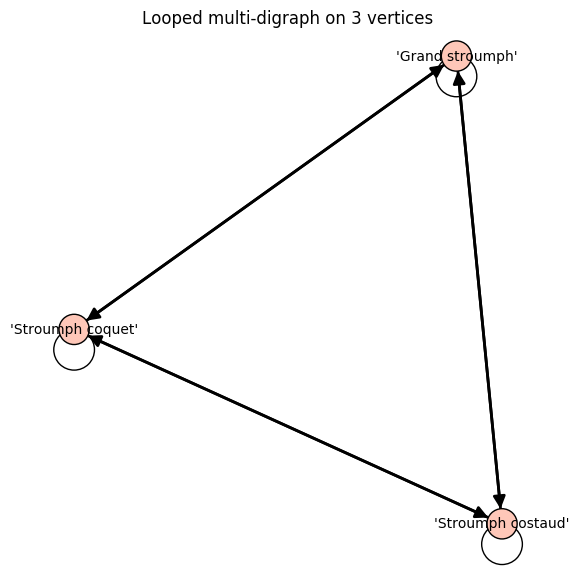

In [88]:
B.cayley_graph()

In [112]:
TestSuite(B).run(verbose=True, skip="_test_pickling")

running ._test_an_element() . . . pass
running ._test_associativity() . . . pass
running ._test_cardinality() . . . pass
running ._test_category() . . . pass
running ._test_elements() . . .
  Running the test suite of self.an_element()
  running ._test_category() . . . pass
  running ._test_eq() . . . pass
  running ._test_not_implemented_methods() . . . pass
  running ._test_pickling() . . . fail
  Traceback (most recent call last):
    File "/opt/sage-git/local/lib/python2.7/site-packages/sage/misc/sage_unittest.py", line 283, in run
      test_method(tester = tester)
    File "sage/structure/sage_object.pyx", line 665, in sage.structure.sage_object.SageObject._test_pickling (/opt/sage-git/src/build/cythonized/sage/structure/sage_object.c:5231)
      tester.assertEqual(loads(dumps(self)), self)
    File "sage/structure/sage_object.pyx", line 1130, in sage.structure.sage_object.dumps (/opt/sage-git/src/build/cythonized/sage/structure/sage_object.c:12525)
      return obj.dumps(compres

In [93]:
B.category()

Join of Category of finite semigroups and Category of finite enumerated sets

In [94]:
B.categories()

[Join of Category of finite semigroups and Category of finite enumerated sets,
 Category of finite semigroups,
 Category of semigroups,
 Category of magmas,
 Category of finite enumerated sets,
 Category of enumerated sets,
 Category of finite sets,
 Category of sets,
 Category of sets with partial maps,
 Category of objects]

In [95]:
B.__class__.mro()

[<class '__main__.BandOfStroumphs_with_category'>,
 <class '__main__.BandOfStroumphs'>,
 <type 'sage.structure.parent.Parent'>,
 <type 'sage.structure.category_object.CategoryObject'>,
 <type 'sage.structure.sage_object.SageObject'>,
 <class 'sage.categories.category.JoinCategory.parent_class'>,
 <class 'sage.categories.finite_semigroups.FiniteSemigroups.parent_class'>,
 <class 'sage.categories.semigroups.Semigroups.parent_class'>,
 <class 'sage.categories.magmas.Magmas.parent_class'>,
 <class 'sage.categories.finite_enumerated_sets.FiniteEnumeratedSets.parent_class'>,
 <class 'sage.categories.enumerated_sets.EnumeratedSets.parent_class'>,
 <class 'sage.categories.finite_sets.FiniteSets.parent_class'>,
 <class 'sage.categories.sets_cat.Sets.parent_class'>,
 <class 'sage.categories.sets_with_partial_maps.SetsWithPartialMaps.parent_class'>,
 <class 'sage.categories.objects.Objects.parent_class'>,
 <type 'object'>]

## Side benefits of having categories as first class objects

In [37]:
C = Semigroups()

In [38]:
C

Category of semigroups

In [40]:
S = C.example()

In [ ]:
S??

In [42]:
C.axioms()

frozenset({'Associative'})

In [117]:
C.structure()

frozenset({Category of additive unital additive magmas,
           Category of additive magmas,
           Category of euclidean domains,
           Category of unital magmas,
           Category of magmas,
           Category of sets with partial maps,
           Category of sets})

In [114]:
C = Fields(); C

Category of fields

In [116]:
C.structure()

frozenset({Category of additive unital additive magmas,
           Category of additive magmas,
           Category of euclidean domains,
           Category of unital magmas,
           Category of magmas,
           Category of sets with partial maps,
           Category of sets})

In [115]:
C.axioms()

frozenset({'AdditiveAssociative',
           'AdditiveCommutative',
           'AdditiveInverse',
           'AdditiveUnital',
           'Associative',
           'Commutative',
           'Distributive',
           'Division',
           'NoZeroDivisors',
           'Unital'})

In [217]:
C = HopfAlgebras(QQ).Graded().Connected().Commutative().WithBasis()

In [218]:
C.structure()

frozenset({Category of additive unital additive magmas,
           Category of additive magmas,
           Category of coalgebras over Rational Field,
           Category of filtered modules over Rational Field,
           Category of graded modules over Rational Field,
           Category of hopf algebras over Rational Field,
           Category of left modules over Rational Field,
           Category of unital magmas,
           Category of magmas,
           Category of right modules over Rational Field,
           Category of sets with partial maps,
           Category of sets})

In [219]:
C.axioms()

frozenset({'AdditiveAssociative',
           'AdditiveCommutative',
           'AdditiveInverse',
           'AdditiveUnital',
           'Associative',
           'Commutative',
           'Connected',
           'Distributive',
           'Unital',
           'WithBasis'})

## Operations on categories
- Adding an axiom

In [98]:
Magmas().Commutative()

Category of commutative magmas

In [99]:
Rings().Commutative()

Category of commutative rings

- Intersection

In [100]:
Groups() & Sets().Finite()

Category of finite groups

In [101]:
C = (AdditiveMagmas() & Magmas()).Distributive(); C

Category of distributive magmas and additive magmas

In [102]:
C = C.AdditiveAssociative().AdditiveUnital().AdditiveCommutative(); C

Category of additive commutative additive associative additive unital distributive magmas and additive magmas

In [103]:
C = C.Associative().Unital(); C

Category of semirings

In [104]:
C = C.AdditiveInverse(); C

Category of rings

In [105]:
C = C.Division(); C

Category of division rings

In [106]:
C = C.Finite(); C

Category of finite fields

In [107]:
C.axioms()

frozenset({'AdditiveAssociative',
           'AdditiveCommutative',
           'AdditiveInverse',
           'AdditiveUnital',
           'Associative',
           'Commutative',
           'Distributive',
           'Division',
           'Finite',
           'NoZeroDivisors',
           'Unital'})

In [108]:
C.structure()

frozenset({Category of additive unital additive magmas,
           Category of additive magmas,
           Category of euclidean domains,
           Category of unital magmas,
           Category of magmas,
           Category of sets with partial maps,
           Category of sets})